## Lab05_Regressao_Linear_02

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Neste jupyter vamos criar um modelo de regressão linear para estimar o valor de seguro de vida a partir de dados de uma pessoa.

Baixe o arquivo insurance.csv a partir do link https://drive.google.com/file/d/1SUVTi3E7RapdRq05KRUnykG_YgmmW76U/view?usp=sharing

Vamos colocar esse arquivo no Google Drive na pasta /arquivos_colab/Lab05 e ler o CSV para criar um novo DataFrame do Pandas.

Segue um resumo abaixo desse Dataset:

<pre>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   float64
 </pre>

Como pode ser visto acima, esse dataset possui 1338 exemplos e 7 colunas, senfo a coluna 'charges' a coluna TARGET

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

## Carregando e Explorando o Dataset

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verificando se o arquivo esta na pasta
%cd /content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab05
%ls -la

/content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab05
total 682
-rw------- 1 root root  26717 Oct 19 15:45 CarPrice_Assignment.csv
-rw------- 1 root root  55628 Oct 19 14:26 insurance.csv
-rw------- 1 root root 573700 Oct 27 11:38 Lab05_Regressao_Linear_02.ipynb
-rw------- 1 root root  40586 Oct 27 11:37 MODELO2.xlsx


In [4]:
# Carregando o Dataset insurance.csv com o pacote Pandas, criando o DataFrame df
df = pd.read_csv("insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Vamos verificar se existem valores nulos
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Vamos conhecer seu conteúdo
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Como pode ser visto acima, temos alguns colunas com valores não numéricos: sex, smoker, region.

Para essas colunas, precisamos aplicar uma transformação de forma que os valores sejam numéricos. Neste exemplom vamos utilizar o método
pandas.get_dummies (https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para fazer a transformação One-Hot-Encoding

Pra facilitar a realização da transformação e remoção da coluna de origem, vamos criar uma função abaixo:



In [7]:
# Criação de função de transformação e remoção da coluna de origem
def get_dummies_and_remove(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [8]:
# Transformando a coluna sex
df = get_dummies_and_remove(df, 'sex')
df.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [9]:
# Transformando a coluna smoker
df = get_dummies_and_remove(df, 'smoker')
df.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [10]:
# Transformando a coluna region
df = get_dummies_and_remove(df, 'region')
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


<Axes: >

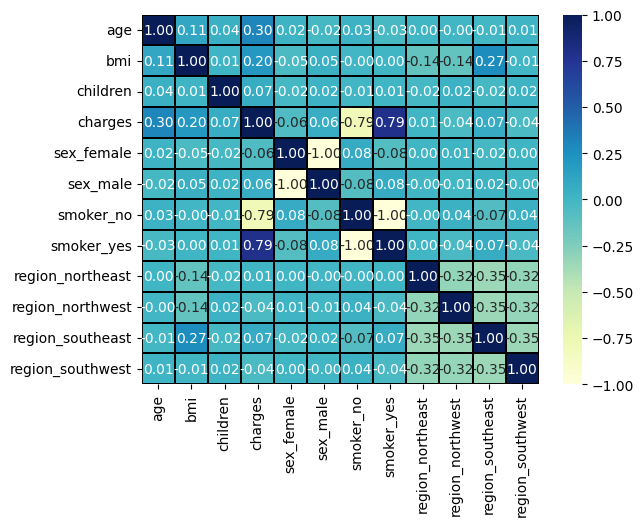

In [11]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

Olhando a tabela de correlação acima, pela coluna 'charges', podemos ver quais variáveis mais influenciam no resultado

In [12]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop(['charges'], axis=1)
y = df['charges'].values

In [13]:
# Variáveis preditoras
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


# Treinamento com todas as variáveis

In [14]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1070, 11)
y_train: (1070,)
X_test: (268, 11)
y_test: (268,)


In [15]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (268,)


In [17]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 33596915.85136146
Mean Absolute Error (MAE): 4181.194473753643
Score R2: 0.7088351277198341
Score: 0.7835929767120723


# Aplicando técnicas de pré-processamento nos dados de treino

In [18]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1070, 11)
y_train: (1070,)
X_test: (268, 11)
y_test: (268,)


In [19]:
# Aplicando PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [20]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [21]:
# prevendo valores para X_test
X_poly_test = poly_reg.fit_transform(X_test)
y_pred = lin_reg_2.predict(X_poly_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (268,)


In [22]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 20792161.086876135
Mean Absolute Error (MAE): 2705.7935495298507
Score R2: 0.8499024847356431
Score: 0.7835929767120723


Veja que aplicando essa técnica conseguimos aumentar a performance do modelo

# Treinamento com variáveis normalizadas

Veja que o nosso dataset está com dados não normalizados. Vamos utilizar a função https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html . Veja e teste outros scalers em https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)
print(X_tr[1])

[-1.50996545  0.5096211  -0.07876719 -0.98959079  0.98959079  0.5074631
 -0.5074631  -0.56526686 -0.56641788  1.63579466 -0.56641788]


In [24]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_tr , y, test_size=0.2, random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1070, 11)
y_train: (1070,)
X_test: (268, 11)
y_test: (268,)


In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (268,)


In [27]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652
Score R2: 0.708835127719834
Score: 0.7835929767120722


Veja que neste caso não causou efeitos melhores que a outra transformação

# Exercício 5.1 - Treinando modelo de Regressão Linear com outuro Dataset

Considere o dataset abaixo

## CarPrice_Assignment.csv (previsão de preços de carros)

* Arquivo CSV: https://drive.google.com/file/d/1ADUBsWOjElgTgCAMSKRqoX2tAnYUHQnL/view?usp=sharing
* Excel com dicionário de dados: https://docs.google.com/spreadsheets/d/1AB_4NYPjii9Pkjc9lnsFR15VfBTN5Ek0/edit?usp=sharing&ouid=104740582732644380801&rtpof=true&sd=true


Adicione novas células de código abaixo e implemente um modelo de Regressão Linear que faça a previsão do valor dos veículos

Crie também uma célula de código para imprimir os valores de MSE, MAE e R2

Finalmente, crie uma célula de Texto para responder se o resultado foi melhor ou pior.

Obs: Antes de entregar seu notebook, verifique se o mesmo está funcionando adequadamente com o menu "Ambiente de Execução > Reiniciar e executar tudo".

Salve o arquivo .ipynb com a opção "Arquivo > Fazer download do .ipynb" e poste pelo Ulife

MODELO - Car Price

In [28]:
# Carregando o Dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
# Verificando se existem valores nulos
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
# Removendo coluna de nome dos carros e id
df = df.drop(['CarName'], axis=1)
df = df.drop(['car_ID'], axis=1)

In [31]:
# Verificando as primeiras 10 linhas do Dataset
df.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [32]:
# Transformando as colunas
colunas = ["fueltype","doornumber","aspiration","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
for coluna in colunas:
    df = get_dummies_and_remove(df, coluna)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


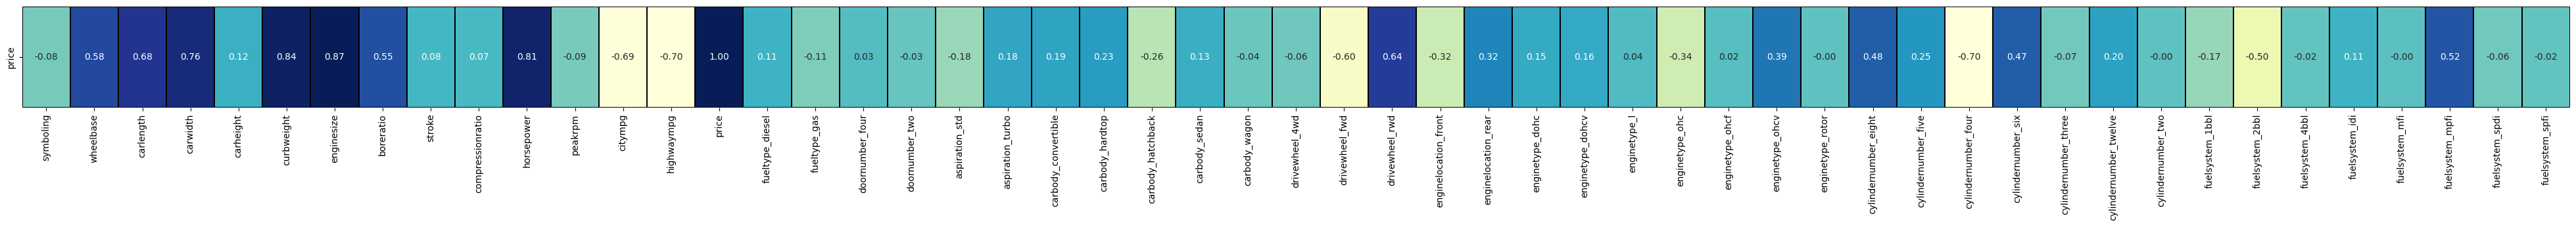

In [33]:
# Plotando a correlação com um mapa de calor
corr_matrix = df.corr()
price_corr = corr_matrix.loc["price"].to_frame().T
plt.figure(figsize=(50, 2))
sns.heatmap(price_corr, robust=True, fmt=".2f", cmap='YlGnBu', annot=True, linewidths=1.09, linecolor='black', cbar=False)
plt.show()

Variáveis que possuem maior correlação com o valor de "price":

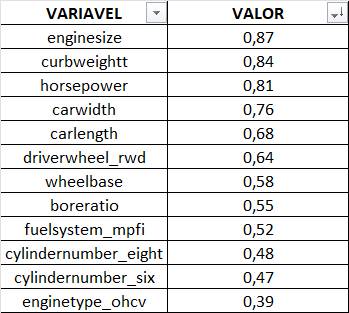



In [34]:
# Separando as variáveis (X) do resultado (y)
X = df.drop(['price'], axis=1)
y = df['price'].values

**Modelo Car Price**

In [35]:
# Versões do modelo
models = [
    [
        [],
        False,
        False,
    ],
    [
        [],
        False,
        True,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
            "wheelbase",
            "boreratio",
            "fuelsystem_mpfi",
            "cylindernumber_eight",
            "cylindernumber_six",
            "enginetype_ohcv",
        ],
        False,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
            "wheelbase",
            "boreratio",
            "fuelsystem_mpfi",
            "cylindernumber_eight",
            "cylindernumber_six",
            "enginetype_ohcv",
        ],
        True,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
            "wheelbase",
            "boreratio",
            "fuelsystem_mpfi",
            "cylindernumber_eight",
            "cylindernumber_six",
            "enginetype_ohcv",
        ],
        False,
        True,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
            "wheelbase",
            "boreratio",
            "fuelsystem_mpfi",
        ],
        False,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
            "wheelbase",
            "boreratio",
            "fuelsystem_mpfi",
        ],
        True,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
        ],
        False,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
            "carwidth",
            "carlength",
            "drivewheel_rwd",
        ],
        True,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
        ],
        False,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
        ],
        True,
        False,
    ],
    [
        [
            "enginesize",
            "curbweight",
            "horsepower",
        ],
        False,
        True,
    ],
]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Função para treinar o modelo
def TrainModel(model, vars, polynomialFeat, normalizeVars):
    if vars == []:
      X_1 = X # Utilizando todas as variáveis
    else:
      X_1 = X[vars].values.reshape((len(X), len(vars))) # Utilizando variáveis específicas

    # Normalização de variáveis
    if normalizeVars:
        scaler = StandardScaler()
        X_1 = scaler.fit_transform(X_1)

    X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=50)

    # Aplicação de Polynomial Features
    X_poly_test = ""
    if polynomialFeat:
        poly_reg = PolynomialFeatures(degree=2)
        X_poly = poly_reg.fit_transform(X_train)
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, y_train)
        X_poly_test = poly_reg.fit_transform(X_test)
        y_pred = lin_reg.predict(X_poly_test)
    else:
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)

    # Print das métricas do modelo
    print(f"---MODELO V{model}---")
    print("Mean Squared Error (MSE):", mean_squared_error(y_pred, y_test))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_pred, y_test))
    print("Score R2:", r2_score(y_pred, y_test))
    if polynomialFeat:
        print("Score:", lin_reg.score(X_poly_test, y_test))
    else:
        print("Score:", lin_reg.score(X_test, y_test))
    print("\n")


# Treinamento de cada modelo
for i in range(len(models)):
    modelVersion = i + 1
    modelVars = models[i][0]
    polynomialFeat = models[i][1]
    normalizeVars = models[i][2]
    TrainModel(modelVersion, modelVars, polynomialFeat, normalizeVars)


---MODELO V1---
Mean Squared Error (MSE): 5000757.872462264
Mean Absolute Error (MAE): 1691.9335660124298
Score R2: 0.9050086230524386
Score: 0.8915205600322597


---MODELO V2---
Mean Squared Error (MSE): 4717249.066266245
Mean Absolute Error (MAE): 1670.2821706573468
Score R2: 0.9075106815929261
Score: 0.8976706031470094


---MODELO V3---
Mean Squared Error (MSE): 10111087.216280239
Mean Absolute Error (MAE): 2255.4930361027227
Score R2: 0.7827027868135489
Score: 0.7806642299706072


---MODELO V4---
Mean Squared Error (MSE): 58150128.88199219
Mean Absolute Error (MAE): 3334.9634570610233
Score R2: 0.6143782358041328
Score: -0.2614274828036145


---MODELO V5---
Mean Squared Error (MSE): 10111087.216280183
Mean Absolute Error (MAE): 2255.493036102638
Score R2: 0.7827027868135705
Score: 0.7806642299706085


---MODELO V6---
Mean Squared Error (MSE): 10578558.635322025
Mean Absolute Error (MAE): 2435.733886774617
Score R2: 0.7697478925540048
Score: 0.770523559489873


---MODELO V7---
Mean 

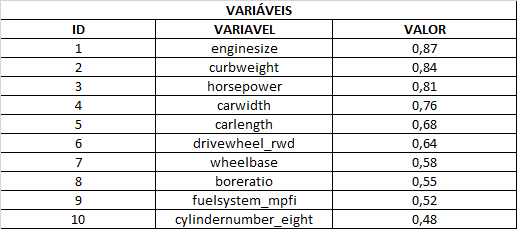

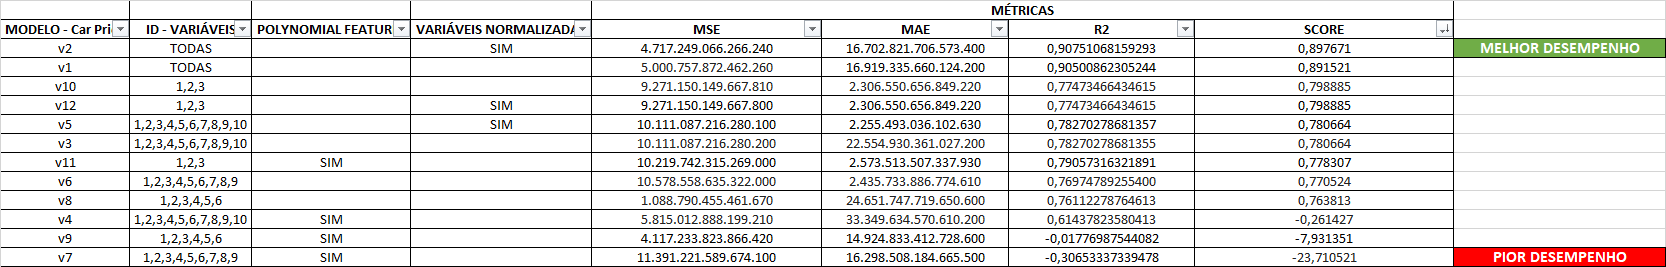